final transformation matrix
⎡-0.000796325700774027  -1.26827205832569e-6   -0.999999682931835   -214.37210
⎢                                                                             
⎢ -0.999998414659776    -0.00159265241150729  0.000796326710733263  788.569960
⎢                                                                             
⎢-0.00159265291648683     0.99999873172754             0            132.155647
⎢                                                                             
⎣          0                     0                     0                    1 

8647854⎤
       ⎥
360575 ⎥
       ⎥
559358 ⎥
       ⎥
       ⎦
jacobian
⎡-788.569960360575  0.000999905690783973            0          ⎤
⎢                                                              ⎥
⎢-214.372108647854    1.25564716123234              0          ⎥
⎢                                                              ⎥
⎢        0           -788.399000093992    -8.88178419700125e-15⎥
⎢                    

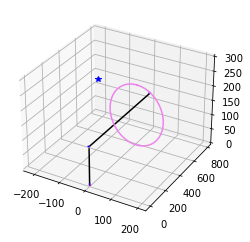


 [1.17496756612316, 2.71219167896359, 0]

 [0.988647340274773, 2.49922253167587, 0]

 [0.809719238948768, 2.28755230047834, 0]

 [0.638092129104595, 2.07768164333946, 0]

 [0.473645508975892, 1.87010397932090, 0]

 [0.316229992796879, 1.66530350376633, 0]

 [0.165667911716582, 1.46375324059339, 0]

 [0.0217540284836488, 1.26591313952332, 0]

 [6.16425636302690, 1.07222822590255, 0]

 [6.03291712561066, 0.883126810558500, 0]

 [5.90745375381117, 0.699018766890661, 0]

 [5.78756004914285, 0.520293882127490, 0]

 [5.67290740876208, 0.347320289381246, 0]

 [5.56314614729418, 0.180442986807961, 0]

 [5.45790690346609, 0.0199824498293180, 0]

 [5.35680212588682, 6.14623334199887, 0]

 [5.25942763199879, 5.99946332969819, 0]

 [5.16536423392913, 5.85991200543104, 0]

 [5.07417942470093, 5.72778992404644, 0]

 [4.98542911802143, 5.60327775576779, 0]

 [4.89865943464878, 5.48652555943480, 0]

 [4.81340852815158, 5.37765217888180, 0]

 [4.72920844271707, 5.27674476488048, 0]

 [4.64558699553455

In [18]:
from sympy import cos, sin, pprint
import numpy as np
import sympy as sp
from math import pi
import matplotlib.pyplot as plt


#forward kinematics
def trans_matrix(a,r,d1,d2):
    t = [sp.Matrix([[cos(a[0]), 0, -sin(a[0]), 0], [sin(a[0]), 0, cos(a[0]), 0], [0, -1, 0, d1], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[1]), -sin(a[1]), 0,r*cos(a[1])], [sin(a[1]),cos(a[1]), 0,r*sin(a[1])], [0, 0, 1, 0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[2]), -sin(a[2]), 0,0], [sin(a[2]),cos(a[2]), 0,0], [0, 0, 1, d2], [0, 0, 0, 1]])]

  #consider identity matrix to initialize
    tran = [sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])]

    # Multiplying transformation matrices
    for i in range(0, len(t)):
        tran.append(tran[i] * t[i])
    print('final transformation matrix')    
    pprint(tran[-1]) 
    return tran


#inverse kinematics
def jacobian(tran):
    j_temp = []
    o_2 = tran[-1].extract([0, 1, 2], [3])              # Extracting Fourth column from final transformation matrix
   
    for i in range(0, len(tran) - 1):
        
        z_i = tran[i].extract([0, 1, 2], [2])          # Extracting zi from Ti matrix
        o_i = tran[i].extract([0, 1, 2], [3])           # Extracting oi from Ti matrix
        row_1 = z_i.cross(o_2 - o_i)                      
        j0n = row_1.col_join(z_i)                         
        j_temp.append(j0n)
    j_1 = j_temp[0]                                       
    for k in range(1, len(j_temp)):
        j_1 = j_1.row_join(j_temp[k])
    return j_1

def circle(x_off, y_off, z_off, r, s):
    t1 = np.linspace(2 * 3.14, 0, s)              
    x_val = []
    z_val = []
    for i in t1:
        x_val.append(r * sin(i) + x_off)           
        z_val.append(r * cos(i) + z_off)           
    y_val = np.ones(s) * y_off
    return x_val, y_val, z_val

def plot_line(f1, f2):
    ax.plot3D([f1[0, 3], f2[0, 3]], [f1[1, 3], f2[1, 3]], [f1[2, 3], f2[2, 3]], 'black')


def plot_frame(f):
    rx = f[:, 0]      
    ry = f[:, 1]      
    rz = f[:, 2]       
    tx = f[0, 3]       
    ty = f[1, 3]       
    tz = f[2, 3]       
    ax.plot3D([tx, 3 * rx[0, 0] + tx], [ty, 3 * rx[1, 0] + ty], [tz, 3 * rx[2, 0] + tz], 'red')
    ax.plot3D([tx, 3 * ry[0, 0] + tx], [ty, 3 * ry[1, 0] + ty], [tz, 3 * ry[2, 0] + tz], 'pink')
    ax.plot3D([tx, 3 * rz[0, 0] + tx], [ty, 3 * rz[1, 0] + ty], [tz, 3 * rz[2, 0] + tz], 'blue')

def plot_arm(tran):
    plot_line(tran[0], tran[1])
    plot_line(tran[1], tran[2])
   
       
    plot_frame(tran[0])
    plot_frame(tran[1])
    plot_frame(tran[2])
   
   
    


if __name__ == '__main__':
    
    
    # Joint-angles in radians
    q = [1.57,3.14,0]   

    # calculating transformation matrices
    
    tm0n = trans_matrix(q,-788.40,130.9,215)

    # calculating the jacobian matrix
    
    j = jacobian(tm0n)
    print('jacobian')
    pprint(j)

    # plotting the arm
    plt.figure()
    ax = plt.axes(projection='3d')
    plot_arm(tm0n)

    # Drawing the circle
   
    x, y, z = circle(100, 260,200, 100, 100)
    ax.plot3D(x, y, z, 'violet')

    time = 5 / len(x)         # Total time by number of points to cover
    
    # For the pen to follow the circle
    
 #inverse kinematics validation   
    for k in range(0, len(x)):
        end_eff = tm0n[-1].extract([0, 1, 2], [-1])                           
        path_to_follow = sp.Matrix([[x[k]], [y[k]], [z[k]]])    
        
        # rate of change of position and angles
            
        rate_pos = (path_to_follow - end_eff) / time                             
        rate_angle = j.pinv() * rate_pos.col_join(sp.Matrix([[0], [0], [0]])) 
            
        for l in range(0, 2): 
            q[l] = ((q[l] + (rate_angle[l] * time)) % (2 * 3.14)) 
          
         
    
        print('\n',q)
                                                                           
        
        plt.pause(0.1)

    plt.show()
    
    
    